In [1]:
%matplotlib inline

import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

import seaborn as sns

In [2]:
help pandas.read_csv

SyntaxError: invalid syntax (<ipython-input-2-9efda77a1eeb>, line 1)

In [3]:
help pandas

SyntaxError: invalid syntax (<ipython-input-3-8efcc25ac34b>, line 1)

In [11]:
df = pd.read_csv('all.csv', header=None, names= ["rating", 'review_count', 'isbn', 'booktype','author_url', 'year', 'genre_urls', 'dir','rating_count', 'name'])
df.head()

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
0,4.40,136455,0439023483,good_reads:book,https://www.goodreads.com/author/show/153394.S...,2008,/genres/young-adult|/genres/science-fiction|/g...,dir01/2767052-the-hunger-games.html,2958974,"The Hunger Games (The Hunger Games, #1)"
1,4.41,16648,0439358078,good_reads:book,https://www.goodreads.com/author/show/1077326....,2003,/genres/fantasy|/genres/young-adult|/genres/fi...,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478,Harry Potter and the Order of the Phoenix (Har...
2,3.56,85746,0316015849,good_reads:book,https://www.goodreads.com/author/show/941441.S...,2005,/genres/young-adult|/genres/fantasy|/genres/ro...,dir01/41865.Twilight.html,2579564,"Twilight (Twilight, #1)"
3,4.23,47906,0061120081,good_reads:book,https://www.goodreads.com/author/show/1825.Har...,1960,/genres/classics|/genres/fiction|/genres/histo...,dir01/2657.To_Kill_a_Mockingbird.html,2078123,To Kill a Mockingbird
4,4.23,34772,0679783261,good_reads:book,https://www.goodreads.com/author/show/1265.Jan...,1813,/genres/classics|/genres/fiction|/genres/roman...,dir01/1885.Pride_and_Prejudice.html,1388992,Pride and Prejudice


In [13]:
df.shape



(6000, 10)

In [15]:
df.shape[0]

6000

In [17]:
df.columns

Index([u'rating', u'review_count', u'isbn', u'booktype', u'author_url', u'year', u'genre_urls', u'dir', u'rating_count', u'name'], dtype='object')

In [18]:
df.year > 1999

0        True
1        True
2        True
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11       True
12       True
13      False
14      False
15      False
16       True
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26       True
27      False
28      False
29      False
        ...  
5970    False
5971     True
5972     True
5973     True
5974     True
5975     True
5976     True
5977    False
5978     True
5979     True
5980    False
5981     True
5982     True
5983    False
5984     True
5985     True
5986     True
5987    False
5988    False
5989     True
5990    False
5991     True
5992     True
5993     True
5994     True
5995     True
5996     True
5997     True
5998     True
5999     True
Name: year, dtype: bool

In [22]:
np.mean(df.year > 1992)

0.64533333333333331

In [23]:
(df.year > 1992).mean()

0.64533333333333331

In [24]:
df.query('year > 2011')

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
26,4.43,112279,0525478817,good_reads:book,https://www.goodreads.com/author/show/1406384....,2012,/genres/young-adult|/genres/book-club|/genres/...,dir01/11870085-the-fault-in-our-stars.html,1150626,The Fault in Our Stars
163,4.17,43787,0007442912,good_reads:book,https://www.goodreads.com/author/show/4039811....,2012,/genres/science-fiction|/genres/dystopia|/genr...,dir02/11735983-insurgent.html,552682,"Insurgent (Divergent, #2)"
284,4.58,15195,1406321346,good_reads:book,https://www.goodreads.com/author/show/150038.C...,2013,/genres/fantasy|/genres/young-adult|/genres/fa...,dir03/18335634-clockwork-princess.html,130161,"Clockwork Princess (The Infernal Devices, #3)"
361,4.32,11770,1442416866,good_reads:book,https://www.goodreads.com/author/show/150038.C...,2012,/genres/fantasy|/genres/young-adult|/genres/fa...,dir04/8755776-city-of-lost-souls.html,193107,"City of Lost Souls (The Mortal Instruments, #5)"
371,3.93,21841,0345803507,good_reads:book,https://www.goodreads.com/author/show/4725841....,2012,/genres/romance|/genres/erotica|/genres/bdsm|/...,dir04/13536860-fifty-shades-freed.html,439710,"Fifty Shades Freed (Fifty Shades, #3)"
400,4.53,9292,1423140605,good_reads:book,https://www.goodreads.com/author/show/15872.Ri...,2012,/genres/fantasy|/genres/young-adult|/genres/fa...,dir05/12127750-the-mark-of-athena.html,128412,"The Mark of Athena (The Heroes of Olympus, #3)"
408,4.14,16926,0062059939,good_reads:book,https://www.goodreads.com/author/show/2987125....,2012,/genres/young-adult|/genres/science-fiction|/g...,dir05/10507293-the-selection.html,173458,"The Selection (The Selection, #1)"
421,3.64,47308,0007524277,good_reads:book,https://www.goodreads.com/author/show/4039811....,2013,/genres/young-adult|/genres/science-fiction|/g...,dir05/18710190-allegiant.html,358301,"Allegiant (Divergent, #3)"
499,4.43,13225,1301949825,good_reads:book,https://www.goodreads.com/author/show/5430144....,2012,/genres/romance|/genres/new-adult|/genres/youn...,dir05/15717943-hopeless.html,118532,"Hopeless (Hopeless, #1)"
509,4.21,13826,0425263908,good_reads:book,https://www.goodreads.com/author/show/19823.Sy...,2012,/genres/romance|/genres/adult-fiction|/genres/...,dir06/13572249-bared-to-you.html,255118,"Bared to You (Crossfire, #1)"


In [28]:
df[df.name == 'Gone Girl']

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
571,3.94,87076,0307588378,good_reads:book,https://www.goodreads.com/author/show/2383.Gil...,2012,/genres/fiction|/genres/mystery|/genres/book-c...,dir06/19288043-gone-girl.html,682110,Gone Girl


In [33]:
df[(df.year > 2011) & (df.rating > 4.5)]

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
284,4.58,15195,1406321346,good_reads:book,https://www.goodreads.com/author/show/150038.C...,2013,/genres/fantasy|/genres/young-adult|/genres/fa...,dir03/18335634-clockwork-princess.html,130161,"Clockwork Princess (The Infernal Devices, #3)"
400,4.53,9292,1423140605,good_reads:book,https://www.goodreads.com/author/show/15872.Ri...,2012,/genres/fantasy|/genres/young-adult|/genres/fa...,dir05/12127750-the-mark-of-athena.html,128412,"The Mark of Athena (The Heroes of Olympus, #3)"
620,4.54,7767,1423146727,good_reads:book,https://www.goodreads.com/author/show/15872.Ri...,2013,/genres/fantasy|/genres/young-adult|/genres/fa...,dir07/12127810-the-house-of-hades.html,72082,"The House of Hades (The Heroes of Olympus, #4)"
911,4.85,26,1491732954,good_reads:book,https://www.goodreads.com/author/show/8189303....,2014,/genres/fiction,dir10/22242097-honor-and-polygamy.html,97,Honor and Polygamy
938,4.51,11011,1481426303,good_reads:book,https://www.goodreads.com/author/show/150038.C...,2014,/genres/fantasy|/genres/young-adult|/genres/fa...,dir10/8755785-city-of-heavenly-fire.html,69924,"City of Heavenly Fire (The Mortal Instruments,..."
953,4.56,27,1477276068,good_reads:book,https://www.goodreads.com/author/show/6621980....,2012,NaN,dir10/16243767-crossing-the-seas.html,90,Crossing the Seas
1109,4.70,23,NaN,good_reads:book,https://www.goodreads.com/author/show/7488658....,2013,/genres/romance,dir12/19181419-a-bird-without-wings.html,56,A Bird Without Wings
1151,4.64,84,1491877928,good_reads:book,https://www.goodreads.com/author/show/7271860....,2013,/genres/war|/genres/historical-fiction|/genres...,dir12/18501652-the-guardian-of-secrets-and-her...,167,The Guardian of Secrets and Her Deathly Pact
1186,4.51,4853,1619630621,good_reads:book,https://www.goodreads.com/author/show/3433047....,2013,/genres/fantasy|/genres/young-adult|/genres/ro...,dir12/17167166-crown-of-midnight.html,34142,"Crown of Midnight (Throne of Glass, #2)"
1300,4.61,24,1499227299,good_reads:book,https://www.goodreads.com/author/show/7414345....,2014,/genres/paranormal|/genres/vampires|/genres/pa...,dir14/22090082-vampire-princess-rising.html,128,Vampire Princess Rising (The Winters Family Sa...


In [34]:
df.dtypes


rating          float64
review_count     object
isbn             object
booktype         object
author_url       object
year            float64
genre_urls       object
dir              object
rating_count     object
name             object
dtype: object

In [35]:
df['rating_count'] = df.rating_count.astype(int)
df['review_count'] = df.review_count.astype(int)


ValueError: invalid literal for long() with base 10: 'None'

In [37]:
df[df.rating_count.isnull()]

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name


In [38]:
df = df[df.year.notnull()]

In [40]:
df.shape

(5993, 10)

In [41]:
df['rating_count']=df.rating_count.astype(int)
df['review_count']=df.review_count.astype(int)
df['year']=df.year.astype(int)

In [42]:
df.dtypes


rating          float64
review_count      int64
isbn             object
booktype         object
author_url       object
year              int64
genre_urls       object
dir              object
rating_count      int64
name             object
dtype: object

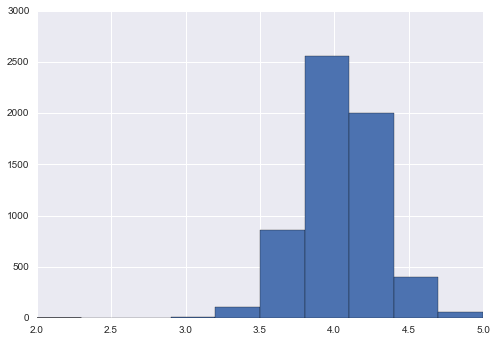

In [43]:
df.rating.hist()

4.04199733022 4.04199733022 4.05


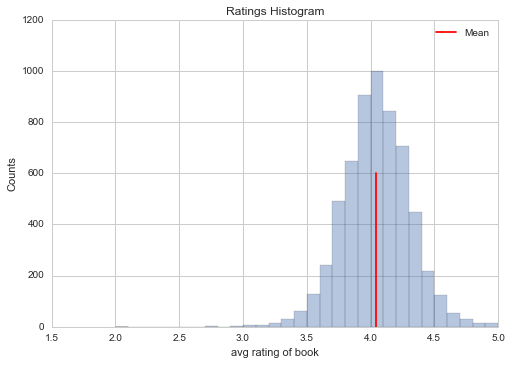

In [46]:
sns.set_context("notebook")
meanrat = df.rating.mean()

print meanrat, np.mean(df.rating), df.rating.median()

with sns.axes_style('whitegrid'):
    df.rating.hist(bins=30, alpha=0.4)
    plt.axvline(meanrat, 0, 0.5, color='r', label='Mean')
    plt.xlabel('avg rating of book')
    plt.ylabel('Counts')
    plt.title('Ratings Histogram')
    plt.legend()

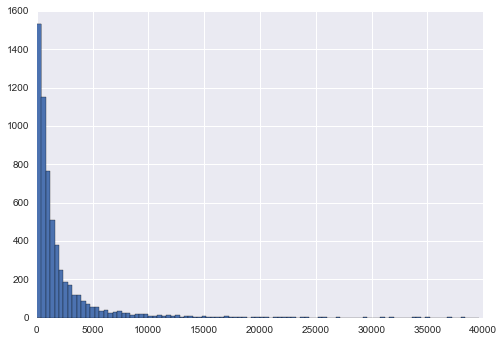

In [47]:
df.review_count.hist(bins = np.arange(0, 40000, 400))

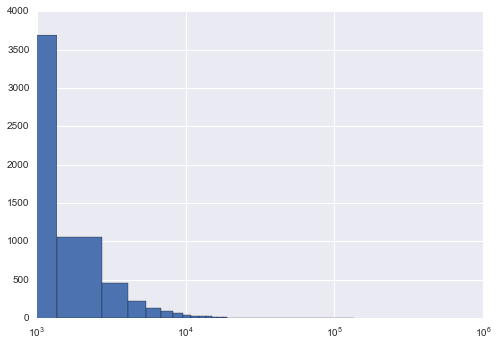

In [49]:
df.review_count.hist(bins=100)
plt.xscale('log')

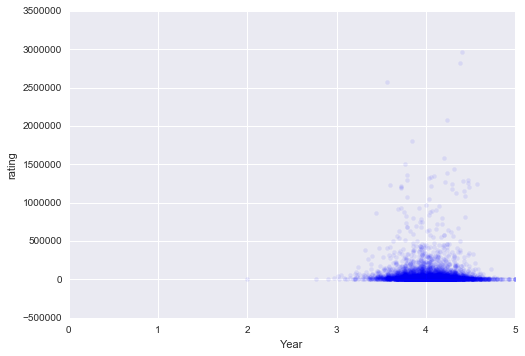

In [67]:
plt.scatter(df.rating, df.rating_count, lw=0, alpha=0.08)
plt.xlim([0,5])
plt.xlabel('Year')
plt.ylabel('rating')


In [55]:
alist = [1,2,3,4]

In [56]:
asqdlst = [i*i for i in alist]

In [57]:
print asqdlst

[1, 4, 9, 16]


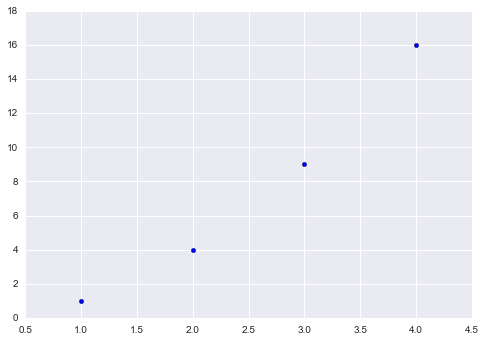

In [58]:
plt.scatter(alist, asqdlst)

(array([  3.89200000e+03,   1.01700000e+03,   3.80000000e+02,
          2.01000000e+02,   1.20000000e+02,   7.70000000e+01,
          4.90000000e+01,   3.70000000e+01,   2.30000000e+01,
          2.70000000e+01,   2.60000000e+01,   1.60000000e+01,
          1.40000000e+01,   1.20000000e+01,   1.50000000e+01,
          9.00000000e+00,   3.00000000e+00,   1.00000000e+00,
          4.00000000e+00,   4.00000000e+00,   1.00000000e+00,
          6.00000000e+00,   2.00000000e+00,   4.00000000e+00,
          3.00000000e+00,   2.00000000e+00,   2.00000000e+00,
          3.00000000e+00,   1.00000000e+00,   3.00000000e+00,
          2.00000000e+00,   3.00000000e+00,   2.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          2.00000000e+00,   0.00000000e+00,   2.00000000e+00,
          1.00000000e+00,   3.00000000e+00,   3.00000000e+00,
          4.00000000e+00,   3.00000000e+00,   2.00000000e+00,
          1.00000000e+00,   2.00000000e+00,   0.00000000e+00,
        

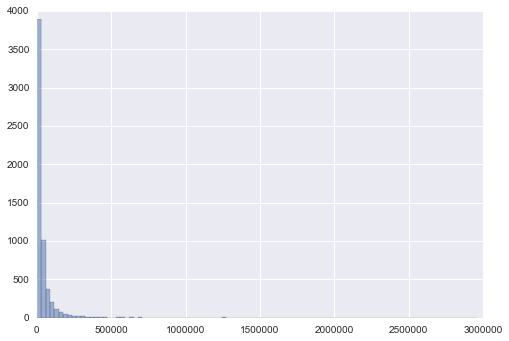

In [69]:
plt.hist(df.rating_count, bins=100, alpha = 0.5)

In [70]:
alist+ alist


[1, 2, 3, 4, 1, 2, 3, 4]

In [71]:
np.array(alist)

array([1, 2, 3, 4])